In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import math as m
from time import time

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

![title](data/TITLE.png)

### <h1><center>Module 9: Discrete-Time Signals </center></h1>

So far in this course we have been discussing continuous operators like the 1D and 2D Fourier Transform. However, almost all of the examples in the notes and in the labs have dealt with discrete functions defined on a regularly sampled arrays.  We will now start discussing explictly the consequences of being in a discrete world.

## Continuous vs. Discrete vs. Digital

There are three types of signals that are functions of time:
1. **Continuous-time** (analog) - $x(t)$: defined on a continuous range of time *t*, amplitude can be any value.
2. **Discrete-time** - $x[nT]$: defined only at discrete instants of time: $t=...-T,0,T,2T...$ where the amplitude can be any value.
3. **Digital** (quantized) - $x_Q[nT]$: both time and amplitude are discrete. Signals only defined at $t=...,-T,0,T,2T,...$ and amplitude is confined to a finite set of numbers.

<img src="Fig/1-SignalTypes.png" width="800">

**Figure 1. Illustrating the differences between continuous-time, discrete-time and quantized signals.**

In DSP we deal with $x_Q[nT]$ because this corresponds with computer-based processing (which is quantized by definition - e.g. 16-bit vs 32-bit system).  In this course we will assume that **discrete-time signal** is equivalent to a **digital signal** (equivalent to saying that the quantizer has infinite resolution).  Thus, we will commonly write continuous and discrete (and quantized) signal as $x(t)$ and $x[nT]$, where parentheses and square brackets will denote continuity and discreteness, respectively.

## Discrete Signals

Discrete-time signals are commonplace in the digital world, including the types of geophyical data that you will be using in your career. In fact, the numerical examples in the previous sections were largely based on discrete time series (though this was not greatly emphsized). As you have observed, discrete-time signals can be generated using a number of different approaches:
* Recording the output of a discrete system (e.g., a series of coin flips);
* <a href="https://en.wikipedia.org/wiki/Sampling_(signal_processing)">Sampling</a> continuous-time signals in the real world; or
* Specifying them in computer software such as Python or Matlab.

Let's now examine the consequences of the signals being discrete!

The discrete time signal $x(nT)$ is equal to continuous signal $x(t)$ only at the sampling interval of $t=nT, n=\{...,-2,-1,0,1,2,...\}$, where $T$ is the **sampling period**.  Thus, $x[n]$ is a **sequence of numbers** $\{...,x[-2],x[-1],x[0],x[1],x[2],...\}$ where $n$ is the temporal index.  To emphasize the discrete nature of the signals, we often use *stem* diagrams that clearly indicate the locations of where samples are located as well as their coefficient magnitude.  For example, see the $cos$ function plotted below:

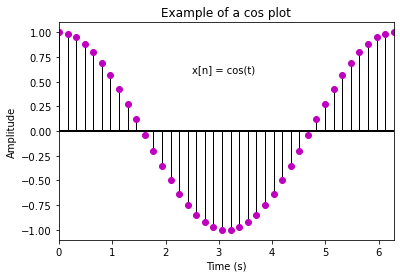

In [2]:
# . . Set the range and sampling of your x axis
tmin,tmax,nt=0,2*np.pi,40

# . . Make a linear array starting at tmin going to tmax with nt points
nn = np.linspace(tmin,tmax, nt)
x = np.cos(nn) 

# . . Create a 'stem plot' of x(t) 
# . . returns three objects that can be changed
markerline, stemlines, baseline = plt.stem(nn, x,'-.')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)
plt.setp(stemlines, 'color', 'k', 'linewidth', 1,'linestyle','-')
plt.setp(markerline, 'color', 'm')
plt.axis([0,2*np.pi,-1.1,1.1])

# . . Add a title and x and y labels
plt.title('Example of a cos plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# . . Add some text on top
plt.text(2.5, 0.6, 'x[n] = cos(t)')
plt.show()

**Figure 2. Illustration of a discrete sequence of a $x[n]=cos(t)$ function using a stem plot.**

# Deterministic Sequences

To write a discrete time series one commonly encounters two important [deterministic](https://en.wikipedia.org/wiki/Deterministic_algorithm) sequences: the **Unit Impulse** and the **Unit Step Function**.

## Unit Impulse

The **Unit Impulse** function is defined as

$$ \delta[n] =  
\left\{
\begin{array}{ll} 
1, & n=0 \\ 
0, & n \neq 0 
\end{array}
\right.
\tag{1}
$$

The impulse is similar to the continuous-time $\delta$-functions; however, it is simplier because the unit impulse $\delta[n]$ is well defined for a $n$ while the delta function $\delta(t)$ is not easily defined at $t=0$. The $\delta[n]$ is an important function because it serves as the building block of any discrete-time signal $y[n]$.  For example, we may write $y[n]$ as the following **discrete convolution** between coefficients $x[n]$ and the unit impulse $\delta[n]$:

$$ 
\begin{eqnarray}
y[n] &=& ... + x[-1]\delta[n+1]+x[0]\delta[n]+x[1]\delta[n-1]+... \\
\, & = & \sum_{k=-\infty}^{\infty} x[k] \delta[n-k].
\end{eqnarray}
\tag{2}
$$

We will look at discrete convolution in a section below.

## Unit Step

The **Unit Step** function is defined as a step up from zero to one at a particular location. For example, the step up at $n=0$ where all positive values are one is given by:

$$ u[n] =  
\left\{
\begin{array}{ll} 
1, & n\ge 0 \\ 
0, & n \lt 0 
\end{array}
\right.
\tag{3}
$$

In addition, the unit step function $u[n]$ can be expressed in terms of an infinite sum of $\delta[n]$ functions at $n\ge 0$:

$$ u[n] = \sum_{k=0}^{\infty} \delta[n-k]. \tag{4} $$

Conversely, we can use $u[n]$ to represent $\delta[n]$:

$$ \delta[n] = u[n]-u[n-1], \tag{5}$$

which represents the difference between unit step functions offset by a single interval.

# Stochastic signals

Apart from [deterministic signals](https://en.wikipedia.org/wiki/Deterministic_system) like those above, it is also important that we be able to model [stochastic or random signals](https://en.wikipedia.org/wiki/Stochastic_process).  Generally speaking, these stochastic processes arise because the input depends on an external state (e.g., computer clock time, random number drawn from a probability distribution).  There are many different types of [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution) that we can draw from.  For example, you may have heard of the following:
* [Gaussian (or normal)]( https://en.wikipedia.org/wiki/Normal_distribution )
* <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">Uniform</a> 
* [Poisson]( https://en.wikipedia.org/wiki/Poisson_distribution ) 

NumPy has a number of different built in random number generators for the various distributions.  The following code generates random number according to the following functions:
* Gaussian - np.random.randn(arg)
* Uniform - np.random.uniform(arg)
where *arg* are the different required input arguments.

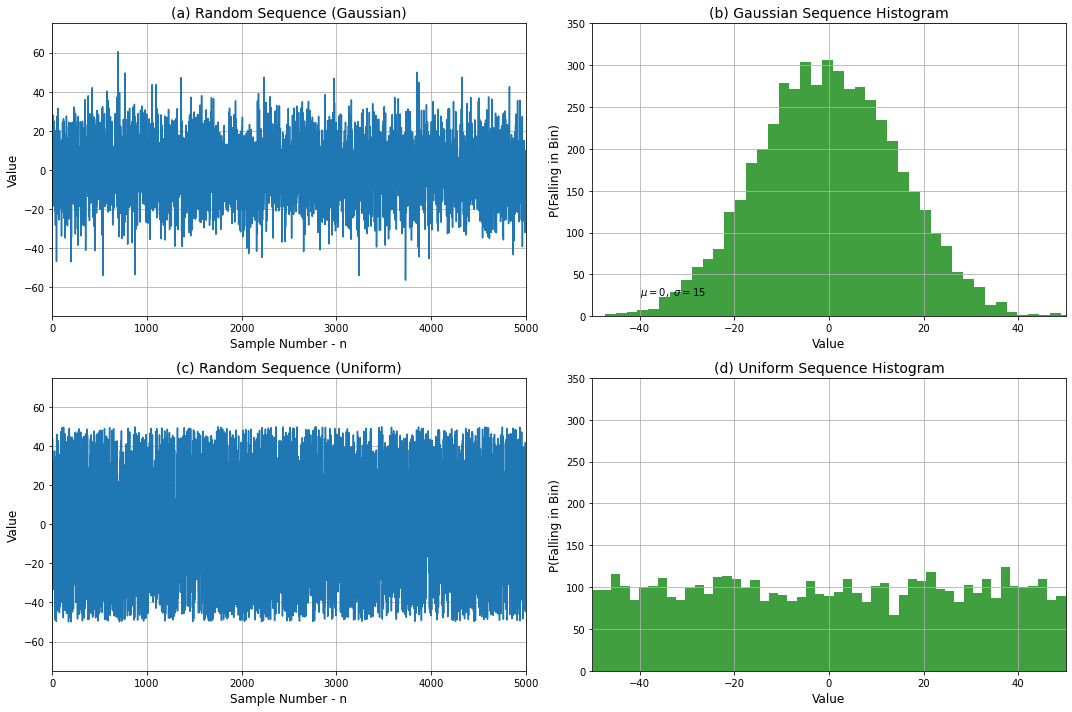

In [3]:
# . . Close previous plotting sessions and define new plot size
plt.close('all')
plt.figure(figsize=(15, 10))

# Fixing random state (for reproducibility)
np.random.seed(19680801)

# . . Can define variables this way
mu, sigma, nrandom = 0, 15, 5000 # . . Or do it this way

###################
###################
###################

# . . Create a random number sequence with Gaussian characteristics
# . . with mean mu and variance sigma using np.random.randn() command
xx = mu + sigma * np.random.randn(nrandom)

# . . Create a subplot that shows the random numbers
plt.subplot(2,2,1)
plt.axis([0, nrandom, -75, 75])
plt.plot(xx)
plt.xlabel('Sample Number - n',size=12)
plt.ylabel('Value',size=12)
plt.grid(True)
plt.title('(a) Random Sequence (Gaussian)',size=14)

###################
###################
###################

# . . Create a histogram of the random numbers
plt.subplot(2,2,2)

# the histogram of the data (returns three objects)
n, bins, patches = plt.hist(xx, 51, facecolor='g', alpha=0.75)

plt.xlabel('Value',size=12)
plt.ylabel('P(Falling in Bin)',size=12)
plt.title('(b) Gaussian Sequence Histogram',size=14)

# . . Plots fancy Latex Greek letters, and replaces the values as strings!
plt.text(-40, 25, r'$\mu=%s,\ \sigma=%s$'%(mu,sigma)) 
plt.axis([-50, 50, 0, 350]) # . . Fix plot axes
plt.grid(True)

###################
###################
###################

# . . Now lets repeat this with a series of uniform random numbers
plt.subplot(2,2,3)

# . . Create a random number sequence with Uniform characteristics
# . . between -50 and 50 using np.random.uniform() command
xx = np.random.uniform(-50,50,nrandom)

plt.axis([0, nrandom, -75, 75])
plt.plot(xx)
plt.xlabel('Sample Number - n',size=12)
plt.ylabel('Value',size=12)
plt.grid(True)
plt.title('(c) Random Sequence (Uniform)',size=14)

###################
###################
###################

# . . Create a histogram of the random numbers
plt.subplot(2,2,4)

# the histogram of the data (returns three objects)
n, bins, patches = plt.hist(xx, 51, facecolor='g', alpha=0.75)

plt.xlabel('Value',size=12)
plt.ylabel('P(Falling in Bin)',size=12)
plt.title('(d) Uniform Sequence Histogram',size=14)

# . . Plots fancy Latex Greek letters, and replaces the values as strings!
plt.axis([-50, 50, 0, 350]) # . . Fix plot axes
plt.grid(True)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 3. Illustration of two types of stochastic signals. (a) A random sequence constructed from a Gaussian (normal) random process. (b) Histogram of values from (a) which begin to form a Gaussian shape. (c)  random sequence constructed from a uniform random process. (b) Histogram of values from (c) which begin to form a uniform shape.**

# Combining Deterministic Signals + Stochastic Processes

There are many scenarios when one chooses to combine deterministic and stochastic models.  Often this is because we know some underlying deterministic physics (i.e., a **linear** operator) or the calibrated response of an instrument (e.g., a geophone).  However, we usually do not know all of the **non-linear** physics to be able to perfectly describe the system, or we have imperfect instruments or unaccounted for stochastic processes (e.g., ambient seismic noise) that we can only describe within a probablistic framework.

Previously we have discussed how to model a linear time-invariant (LTI) system as a linear combination of deterministic and random signals (i.e., noise). For example, the output from an instrument with random noise is often given by a **discrete convolution** model:

$$ y[n] = \sum_{m=0}^{M} x[m] h[n-m] + N[n]. \tag{6} $$

A specific example could be where $x[n]$ is the seismic response of the earth, $h[n]$ is the known **linear** response of your recording system, and $N[n]$ is a noise component representing non-linear or unpredictable phenomena (e.g., instrument drift, thermal fluctuations).  We do not know what these are in advance, but could assume that they are represented by, say, some underlying random Gaussian process.

# Characteristics of discrete-time systems

A **discrete-time system** is an operator $\mathcal{T}$ that maps an input sequence $x[n]$ into an output sequence $y[n]$ according to:

$$ y[n] = \mathcal{T}\left\{x[n]\right\} \tag{7}$$

Examples of such a $\mathcal{T}$ can be any types of **filters** (e.g., bandpass, lowpass, highpass, bandreject) that you would apply to discrete input data $x[n]$ (e.g., a seismic trace) to generate filtered output data (e.g., a bandpassed seismic trace).

Discrete-time systems have a number of important properties including: 

* **Memory**
* **Linearity**
* **Time-invariance**
* **Causality**
* **Stability**

## Memory

The first important property of a discrete-time system is **memory**.  Basically, this can be thought of like human memory in that you have memory of previous events in your life from the **past**; however, you do not have memories from the **future**.  If you were so unfortunate to have an accident where you lose your previous memories, then you would be said to be without memory or **memoryless**.  Put mathematically, we can define it the following way:

<div class="alert alert-info" role="alert">
An system is considered to be <strong>memoryless</strong> if $y[n]$ at time $n$ depends <strong>only</strong> on $x[n]$ at time $n$; otherwise the system is said to have <strong>memory</strong>.
</div>

**Solution Approach:** Generally, these can be determined by inspection of the system.  Because the system **output** $y[n]$ is at temporal index $n$, all of the **input** terms must either be a function of time sample $n$ (i.e., not $n+1$ or $n-1$) or a constant. 

**EXAMPLE 1-1:** Is this system memoryless?

$$y[n] = \left(x[n]\right)^2 +2 \tag{8a}$$

**A:** This system is **memoryless** because both the input and the output are dependent only on time sample $n$ and a constant value 2.

**EXAMPLE 1-2:** Is this system memoryless?

$$y[n] = x[n] + x[n-2] \tag{8b}$$

**A:** This system has **memory** because the output $y[n]$ depends on the input at both sample $n$ and $n-2$.

## Linearity

Another important property that we have looked at previously is **linearity**.  This was important when we discussed LTI systems; however, we repeat this again here for completeness.

<div class="alert alert-info" role="alert">
An system is considered to be <strong>linear</strong> if it obeys the principle of <strong>superposition</strong>.  That is, if 


$$y_1[n] = \mathcal{T}\left\{x_1[n]\right\} \quad \mathrm{and}  \quad y_2[n] = \mathcal{T}\left\{x_2[n]\right\}, \tag{9a}$$


than a system is **linear** if the following is true for all $n$:

$$
\begin{eqnarray}\mathcal{T}\left\{a x_1[n]+b x_2[n]\right\} &=& a\mathcal{T}\left\{x_1[n]\right\}
+b \mathcal{T}\left\{x_2[n]\right\} \\
\, &=& a y_1[n]+b y_2[n] \tag{9b}
\end{eqnarray}$$

where $a$ and $b$ are real numbers. Note that this test combines two items: **additivity** (the two terms) and **homogeneity** (scaling via coefficients).  
</div>

**Solution Approach**: A standard approach to determine linearity of a system is as follows: Let

$$ y_i[n] = \mathcal{T}\left\{x_i[n]\right\}, \quad i=1,2,3  \tag{10} $$

Let's first assume that the cumulative **input** $x_3[n]$ is a linear combination of the other two **input** sequences $x_1[n]$ and $x_2[n]$:

$$ x_3[n] = a x_1[n] + b x_2[n] \tag{11}. $$

The system is **linear** if and only if the cumulative **output** $y_3[n]$ is the same linear combination of the other two **output** sequences:

$$y_3[n]=a y_1[n]+b y_2[n]. \tag{12}$$ 

If this result does not hold, then the system is considered to be **nonlinear**.  

**EXAMPLE 2-1**: Determine whether or not the following system with input $x[n]$ and output $y[n]$ is linear: 

$$ y[n] = \sum_{k=-\infty}^{n} x[k]. \tag{13a}$$

To address this problem, let's write out our solution approach using three (unspecified) sequences that satisfy equation 13a:

$$
\begin{eqnarray} 
ay_1[n] &=& a\sum_{k=-\infty}^{n} x_1[k] \tag{13b} \\
by_2[n] &=& b\sum_{k=-\infty}^{n} x_2[k] \tag{13c} \\
 y_3[n] &=&  \sum_{k=-\infty}^{n} x_3[k] \tag{13d} \\
 x_3[n] &=&  ax_1[k]+bx_2[k] \tag{13e} 
\end{eqnarray}
$$

Let's start with equation 13d and then substitute in expression in equation 13e
$$
\begin{eqnarray}
y_3[n] &=& \sum_{k=-\infty}^{n} x_3[k] \tag{14a} \\
\, & = & \sum_{k=-\infty}^{n} \left(ax_1[k]+bx_2[k]\right)\tag{14b}\\
\, & = & a\sum_{k=-\infty}^{n} x_1[k] + b\sum_{k=-\infty}^{n} x_2[k] \tag{14c}  \\
\, & = & ay_1[n]+by_2[n],  \tag{14e}
\end{eqnarray}
$$

where the final two steps involved replacing terms with equations 13b and 13c. Thus, by following the solution approach we have demonstrated that the system is **linear**.

**EXAMPLE 2-2:** Determine whether the following system with input $x[n]$ and output $y[n]$ is linear:  

$$ y[n] = 3x^2[n]+2x[n-3] \tag{15} $$

Your first instinct is that this system is likely **non-linear** because of the square of one of the input sequences.  However, to show it formally, let's use inputs $x_i[n]$ where $i=1,2,3$ to define the system outputs $y_i[n]$ in the following way: 

$$y_i[n]=3x_i^2[n]+2x_i[n-3],  \quad i=1,2,3  \tag{16a}$$ 

Again, starting with a output $y_3[n]$ and using a linear combination of input sequences, 

$$x_3[n]=ax_1[n]+bx_2[n], \tag{16b}$$ 

allows us to write the following system output by **direct substitution**:

$$
\begin{eqnarray}
y_3[n] &=& 3x_3^2[n]+2x_3[n-3]   \tag{16c} \\
\, & = & 3\left(ax_1[n]+bx_2[n]\right)^2+2(ax_1[n-3]+bx_2[n-3]) \tag{16d} \\
\, & = & 3\left(a^2x_1^2[n]+b^2x^2_2[n] +2ab x_1[n]x_2[n]\right) + 2(ax_1[n-3]+bx_2[n-3]) \tag{16e}
\end{eqnarray}
$$

where to get to equation 16d we have directly substituted equation 16b and then expanded the result (equation 16e).  However, if the system is **linear** then we know that the **output** terms must be linear as well and the following must be true:
$$
\begin{eqnarray}
y_3[n] & = & ay_1[n] + by_1[n]  \tag{16f}\\
\, & = & a\left( 3x^2_1[n]+2x_1[n-3] \right) + b\left( 3x^2_2[n]+2x_2[n-3]  \right)  \tag{16g}\\
\end{eqnarray}
$$

Thus, because equations 16e and 16g are not equal, the system must be **non-linear**.

## Time invariance 

The third important property of a discrete time system is **time invariance**. As suggested by the name, applying a **time invariant** system either yesterday, today or tomorrow will not change actual result. On the other hand, systems that are **time variant** are those where the initiation time absolutely matters! Mathematically, we may describe **time invariance** in the following way:

<div class="alert alert-info" role="alert">
A system is <strong>time invariant</strong> if a shift of input causes a corresponding shift in output.  That is, if $y[n]=\mathcal{T}\left\{x[n]\right\}$, then a system is time invariant if and only if (iff)

$$ y[n-n_0] = \mathcal{T}\left\{x[n-n_0]\right\} \tag{17} $$

for all $n_0$.
</div>

**Solution Approach:** The general approach to check for time invariance is to make a substitution $n\rightarrow n-n_0$ for both the input and output variables.  To be time invariant, the shift must not have affected the overall result.

**EXAMPLE 3-1:** Determine whether the following system with input $x[n]$ and output $y[n]$ is time invariant:

$$ y[n] = \sum_{k=-\infty}^{n} x[k] \tag{18} $$

From equation 18 we know that introducing a time lag $n_0$ will result in the following lagged output $y[n-n_0]$:

$$ y[n-n_0]=\sum_{k=-\infty}^{n-n_0} x[k] \tag{19} $$

which we computed effectively by shifting the index according to $n \rightarrow n-n_0$.  Let's now introduce the same lag to the input $x_1[n]=x[n-n_0]$ and see what the resulting system output is.  First, let's start by introducing an equation similar to equation 18, but with subscripts $y_1[n]$ and $x_1[n]$.  We're going to eliminate these by substitutions to work our way back to equation 19.

$$ 
\begin{eqnarray} 
y_1[n] &=& \sum_{k=-\infty}^{n} x_1[k] \tag{20a}\\
&=& \sum_{k=-\infty}^{n} x[k-n_0] \tag{20b}\\
&=& \sum_{l+n_0=-\infty}^{n} x[l], \quad l=k-n_0 \tag{20c} \\
&=& \sum_{l=-\infty}^{n-n_0} x[l], \tag{20d} \\
&=& y[n-n_0] \tag{20e}
\end{eqnarray}
$$ 

The step to equation 20b involved substituting in the definition of the a time lagged signal.  The step in equation 20c involved making the substitution $l=k-n_0$ in the argument of $x[n]$ as well as $k=l+n_0$ in the sum. The next step involved shifting the index in the sum by $n_0$ terms, which also involved  changing the upper bound to account for the fact that we are summing $n_0$ fewer terms in the series (i.e., when $k$ reaches $n$ we note that $l$ would reach $n-n_0$).  Finally, the last result involved using the identity in equation 19.  Thus, because we have shown that $x[n]\rightarrow x[n-n_0]$ generates $y[n]\rightarrow y[n-n_0]$ we have determined that the system is **time invariant**.

**EXAMPLE 3-2:** Determine whether the following system with input $x[n]$ and output $y[n]$ is time invariant:

$$ y[n]=3x[3n] \tag{21} $$

From the given input-output relationship $y[n-n_0]$ is of the form:

$$ y[n-n_0] = 3x[3(n-n_0)] =3x[3n-3n_0] \tag{22} $$

which we calculated in the same way as equation 19 above by directly substituting $n\rightarrow n-n_0$ into equation 22 and expanding the results.  However, if we shift the input by $n_0$ samples to get $x_1[n]=x[n-n_0]$ and $y_1=y[n-n_0]$ like we did in equations 20, then the system output will be:

$$ y_1[n] = 3x_1[3n]  \tag{23a} $$

$$ y_1[n] = 3x[3n-n_0] \tag{23b} $$

$$ y[n-n_0] = 3x[3n-n_0] \tag{23c} $$

Thus, because the expressions in equations 22 and 23c are not equivalent, we can say that the system is **time variant**.

## Causality

Another important property in digital signals as well as physics is **causality**.  From physics, we know that any event happening in the present cannot be affected by an action from the future; however, it can be affected by previous actions.  This is the **causality principle**.  In digital signal processing, though, we often have recorded our signals in advance and are processing later on.  Thus, we can play around with causality when defining our digital systems. Put mathematically, 

<div class="alert alert-info" role="alert">
A system is considered <strong>causal</strong> if output $y[n]$ at time $n$ depends on input $x[n]$ up to the current time $n$ but no <strong>future</strong> value (i.e., no dependence on $n+m$ where $m>0$).  However, if output $y[n]$ depends exclusive on $x[n]$ for $n$ at current and <strong>future</strong> values, then the system is considered <strong>acausal</strong> or <strong>anticausal</strong>. Finally, a system the depends on past, current and future values is considered a <strong>non-causal</strong> system.  
    
For <strong>LTI systems</strong> there is an alternate definition: A LTI system is causal if its impulse response $h[n]$ satisfies:

$$h[n]=0, n<0 \tag{24} $$

</div>

**Solution Approach:** Many of the systems can be examined by inspecting the input terms - especially if they are all in the numerator.  (Systems with input terms in the denominator are a bit more challenging to handle since one may use expansions to create approximations, e.g. , binomial expansions of $\frac{1}{1-x}$.)

**EXAMPLE 4-1:** Are the following systems causal?

$$\begin{eqnarray}
y[n] &=& x[n]+x[n+1] \tag{25a} \\
y[n] &=& x[n]+x[n-2] \tag{25b} \\
y[n] &=& x[n-1]+x[n]+x[n+1] \tag{25c}
\end{eqnarray}
$$

1. The first system is **anticausal** because $y[n]$ is dependent on an $n$ at current and **future** times.
2. The second system is **causal** because $y[n]$ is dependent on an $n$ on current and **previous** values.
3. The third system is **non-causal** because $y[n]$ is dependent on an $n$ at past and future values.

## Stability

The final property that we will consider is **stability**. Mathematically, we can define stability in the following way:

<div class="alert alert-info" role="alert">
A system is considered <strong>stable</strong> if a bounded input sequence $x[n]$ (i.e., $\sum_{n=-\infty}^{\infty}\left|x[n]\right|\lt\infty$) produces a bounded output sequence $y[n]$ (i.e., $\sum_{n=-\infty}^{\infty}|y[n]|\lt\infty$). 
    
For an <strong>LTI system</strong> stability also corresponds to 

$$\sum_{n=-\infty}^{\infty} |h[n]| \lt \infty, \tag{26} $$

which basically states that as long as the filter coefficients $h[n]$ are finite, then the output sequence $y[n]$ will similarly be a bounded sequence.
</div>

**Solution Approach:** For LTI systems, it is fairly straightforward to apply the formula in equation 26 to determine stability. (For non-LTI systems this gets quite a bit more involved, and we will not be touching these during this course.)

**EXAMPLE 5-1:** Are the following systems stable?

$$\begin{eqnarray}
y[n] &=& x[n]+x[n+1] \tag{27a} \\
y[n] &=& 1/x[n]      \tag{27b}
\end{eqnarray}
$$

(1) We identify the following impulse response function $h[n] = \delta[n]+\delta[n+1]$, which follows from the properly of discrete convolution that we examined before:

$$ y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k] = \sum_{k=-\infty}^{\infty} x[k] \left(\delta[n-k]+\delta[n+1-k]\right) = x[n]+x[n+1] \tag{28} $$

Accordingly, we write:

$$\sum_{n=-\infty}^{\infty} \left|h[n]\right| = \sum_{n=-1}^{0} \left|\delta[n]\right|+\left|\delta[n+1]\right| =2 \lt \infty. \tag{29}$$

In the second equality we have enforced the summation from -1 to 0 because these are the only $n$ values that will yield non-zero $\delta[\cdot]$ values.  Note that equation 29 indicates that the system is **stable** as per equation 26.

(2) We identify the impulse response $h[n]=(x[n])^{-2}$. To be bounded, $x[n]$ must be zero at some values of $n$ between $-\infty<n<\infty$.  Thus, $|h[n]|$ is not bounded and does not satisfy the requirement stated in equation 26.

# Convolution (LTI systems)

Let's now return to convolution that we studied in the previous section so that we can be more precise in our definition of **discrete convolution**.

**DISCRETE CONVOLUTION DEFINITION** 

<div class="alert alert-info" role="alert">
The input-output relationship for an <strong>LTI system</strong> is characterized by a <strong>convolution</strong>:

$$y[n] = x[n] \otimes h[n]  = \sum_{m=-\infty}^{\infty} x[m]h[n-m]. \tag{30} $$

where $\otimes$ is the discrete convolution symbol.
</div>

Note that this is similar to the definition of convolution in the case of a continuum; however, it is simpler because it needs only additions and multiplications.  

**COMMUTIVITY** 

Convolution is **commutative**; that is 

$$ 
\begin{eqnarray}
x[n]\otimes h[n] &=& h[n] \otimes x[n] \tag{31a} \\
\, &=& \sum_{m=-\infty}^{\infty} x[m]h[n-m] = \sum_{m=-\infty}^{\infty} h[n-m]x[m] \tag{31b}
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
y[n] &=& x[n]\otimes h_1[n] \otimes h_2[n]  \\ 
   \,&=& x[n]\otimes h_2[n] \otimes h_1[n] \tag{32}  \\
   \,&=& x[n]\otimes\left(h_2[n] \otimes h_1[n] \right) \\
\end{eqnarray}
$$

Figure 4 shows the commutative property of convolution.

<img src="Fig/3.1 Convolution.png" width="300">

**Figure 4. Illustrating the commutative property of convolution.**

**LINEARITY:** 

Because an LTI system is linear, the following holds:

$$y[n] = x[n] \otimes \left( h_1[n]+h_2[n] \right) = x[n] \otimes h_1[n] + x[n] \otimes h_2[n] \tag{33} $$

Figure 5 shows the linearity propertive of convolution.

<img src="Fig/3.1 Linearity.png" width="300">

**Figure 5. Illustrating the commutative nature of the linearity property.**


### EXAMPLE 6

**Q:** Compute the output $y[n]$ if the input is $x[n]=u[n]$ and the LTI system impulse response is $h[n]=\delta[n]+\frac{1}{2}\delta[n-1]$.  Determine the stability, causality and memory of the system.

**A:** The discrete convolution equation is given by:

$$
\begin{eqnarray}
y[n] &=& x[n] \otimes h[n]=\sum_{m=-\infty}^{\infty} x[m]h[n-m] \tag{34a}\\
   \,&=& \sum_{m=-\infty}^{\infty} u[m] \left(\delta[n-m]+\frac{1}{2}\delta[n-1-m]\right) \tag{34b}  \\
 \,&=& \sum_{m=0}^{\infty}\left(\delta[n-m]+\frac{1}{2}\delta[n-1-m]\right)  \tag{34c} \\  
  \,&=& \sum_{m=0}^{\infty}\delta[n-m]+\frac{1}{2}\sum_{m=0}^{\infty}\delta[n-1-m] \tag{34d}\\
   \,&=& u[n]+\frac{1}{2}u[n-1] \tag{34e}
\end{eqnarray}
$$

Since $\sum_{n=-\infty}^{\infty}|h[n]| = \sum_{n=0}^{1}|h[n]|=\frac{3}{2} \lt \infty$ and $h[n]=0$ for $n\lt0$ the system is stable, causal and has memory.

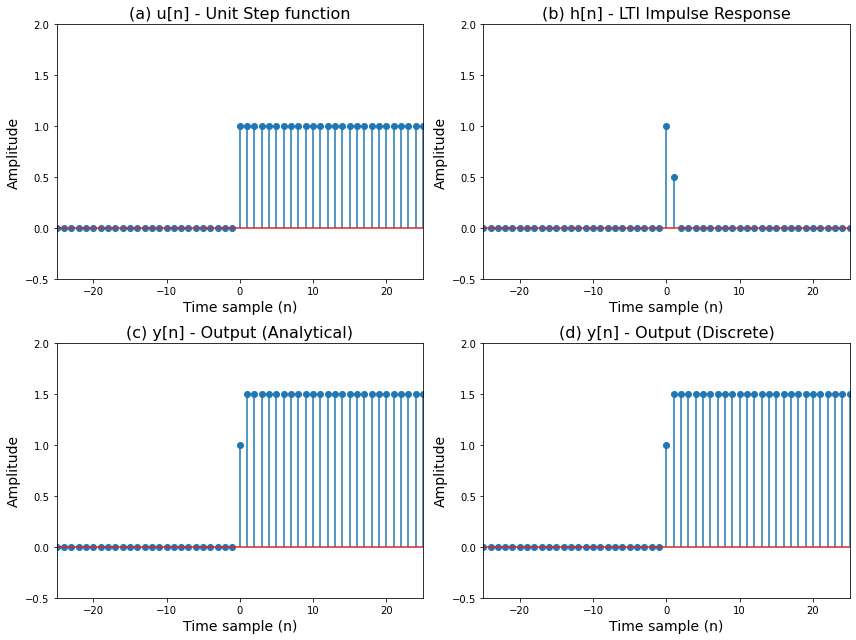

In [2]:
# . . Define the time samples 'n'
nn=50;
n = np.arange(-nn/2,nn/2+1,1) 

# . . Define step function input
x = np.zeros(n.size)
x [np.where( n > -1 )] = 1

# . . Define h(t) - LTI impulse reponse
h = np.zeros(n.size)
h [np.where(n == 0)] = 1.0
h [np.where(n == 1)] = 0.5

# . . Define y(t) - output (computed analytically)
y1= np.zeros(n.size)
y1[np.where(n > -1)] = 1
y1[np.where(n > 0)] = 1.5

# . . Let's use the convolve function in np.signal.convolve!
# . . Define y(t) - output (computed numerically)
y2=np.convolve(x, h, mode='same') 

# . . Let's plot and compare!
plt.figure(figsize=(12, 9))

plt.subplot(221)
plt.stem(n,x)
plt.axis([-nn/2,nn/2,-0.5,2])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) u[n] - Unit Step function',fontsize=16)

plt.subplot(222)
plt.stem(n,h)
plt.axis([-nn/2,nn/2,-0.5,2])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) h[n] - LTI Impulse Response',fontsize=16)

plt.subplot(223)
plt.stem(n,y1)
plt.axis([-nn/2,nn/2,-0.5,2])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) y[n] - Output (Analytical)',fontsize=16)

plt.subplot(224)
plt.stem(n,y2)
plt.axis([-nn/2,nn/2,-0.5,2])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(d) y[n] - Output (Discrete)',fontsize=16)

plt.tight_layout() 
plt.show()

**Figure 6. Illustrating the discrete convolution between (a) a unit step function $u[n]$ and (b) a LTI response $h[n]$ which yields (c) discrete convolution result $y[n]$. (d) is the analytical result in equation 34e above.**

Let's now calculate the difference between the analytical and numerical results:

In [5]:
print("THE DIFFERENCE BETWEEN ANALYTICAL AND NUMERICAL RESULTS IS:")
print(y2[0:nn]-y1[0:nn])

THE DIFFERENCE BETWEEN ANALYTICAL AND NUMERICAL RESULTS IS:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [9]:
a = np.zeros(6)
b = np.zeros(2)
a=[1,1,1,1,1,1]
b=[1,-1]

c= np.convolve (a,b)
c

array([ 1,  0,  0,  0,  0,  0, -1])

### EXAMPLE 7

**Q:** Compute the output $y[n]$ if the input is $x[n]=a^n u[n]$ and the LTI system impulse response is $h[n]=u[n]-u[n-10]$.  Determine the stability and causality of the system.

**A:** Using the above we have:

$$
\begin{eqnarray}
y[n] & = & \sum_{m=-\infty}^{\infty} x[m] h[n-m] \tag{35a}\\
\  \,& = & \sum_{m=-\infty}^{\infty} a^m u[m] \left(u[n-m]-u[n-m-10]\right) \tag{35b}\\
\  \,& = & \sum_{m=0}^{\infty} a^m \left(u[n-m]-u[n-m-10]\right) \tag{35c}\\
\  \,& = & \sum_{m=0}^{\infty} a^m u[n-m]- \sum_{m=0}^{\infty} a^m  u[n-m-10] \tag{35d}\\
\end{eqnarray}
$$

Define $y_1[n]=\sum_{m=0}^{\infty} a^m u[n-m]$ and $y_2[n]=\sum_{m=0}^{\infty} a^m  u[n-m-10]$ such that $y[n]=y_1[n]-y_2[n]$.  By employing a change of variable (i.e., $n-m=k$ or $m=n-k$)

$$
\begin{eqnarray}
y_1[n] &=& \sum_{m=0}^{\infty} a^m u[n-m] = 
\sum_{n-k=0}^{\infty} a^{n-k} u[k] =
\sum_{k=n}^{-\infty} a^{n-k} u[k], \quad k=n-m \tag{36} \\ 
 \, &=& \sum^{n}_{k=-\infty} a^{n-k} u[k] 
\end{eqnarray}
$$

Since $u[k]=0$ for $k<0$, $y_1[n]=0$ for $n<0$.  For $n\ge 0$, $y_1[n]$ is given by a [geometric series](http://mathworld.wolfram.com/GeometricSeries.html)

$$ y_1[n] =\sum_{k=0}^{n} a^{n-k} u[k]=\sum_{k=0}^{n} a^{n-k} = 1+a+...+a^n = \frac{1-a^{n+1}}{1-a},n\ge0. \tag{37} $$

That is, 

$$ y_1[n] = \frac{1-a^{n+1}}{1-a} u[n]. \tag{38} $$

Similarly, $y_2[n]$ is:

$$ 
\begin{eqnarray}
y_2[n] &=& \sum_{m=0}^{\infty} a^m u[n-10-m]  \\
     \,&=& \sum_{k=-\infty}^{n-10}a^{n-10-k} u[k], \quad k=n-10-m.  \tag{39}
\end{eqnarray}
$$

Since $u[k]=0$ for $k<0$, $y_2[n]=0$ for $n<10$.  Thus, for $n \ge 10$, $y_2[n]$ is:

$$ y_2[n] = \sum_{k=0}^{n-10}a^{n-10-k} u[k] = \sum_{k=0}^{n-10}a^{n-10-k}  =1+a+...+a^{n-10} = \frac{1-a^{n-9}}{1-a},n \ge 10 \tag{40} $$

That is,

$$ y_2[n] = \frac{1-a^{n-9}}{1-a}u[n-10] \tag{41} $$

Combining the results we have

$$ y[n] = \frac{1-a^{n+1}}{1-a} u[n] - \frac{1-a^{n-9}}{1-a} u[n-10], \tag{42} $$

or 

$$y[n] = \left\{
\begin{array}{ll}
0, & n<0\\
\frac{1-a^{n+1}}{1-a}, & 0\le n <10 \\
\frac{a^{n-9}(1-a^{10})}{1-a}, & n \ge 10
\end{array}
\right.
\tag{43}
$$

Note: because $h[n]=0$ for $n<0$ the sytem is causal.  However, is it stable (think about the value of $a$ above)?

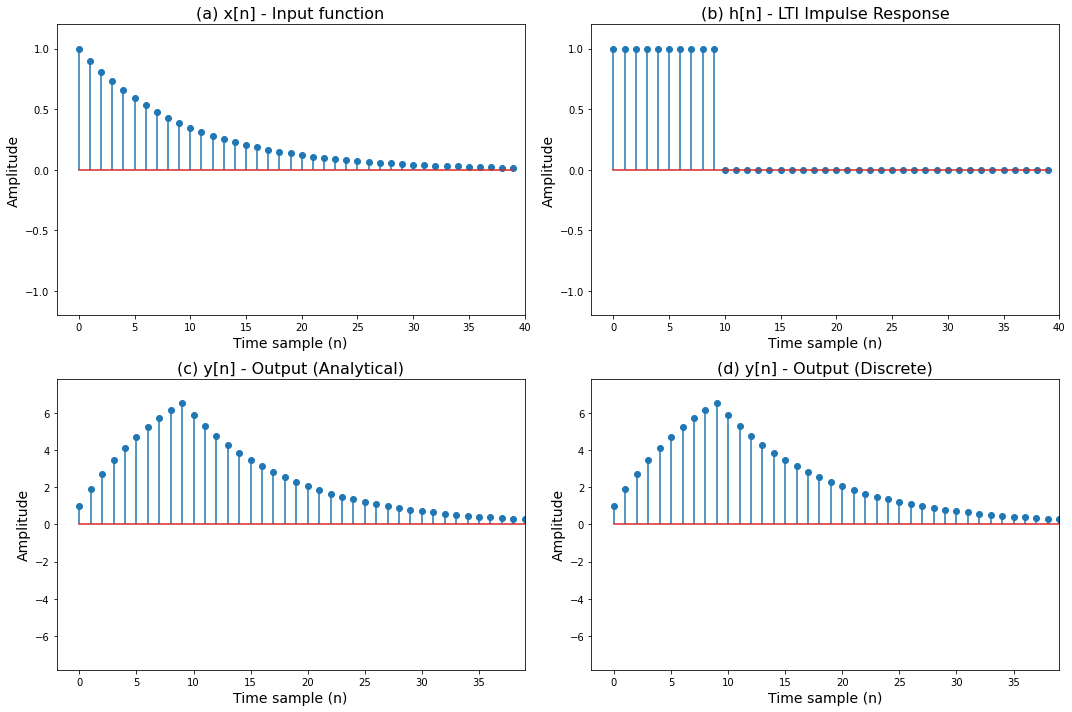

In [4]:
# . . Define the time samples 'n'
nlen=40;
n = np.arange(0,nlen,1) 

# . . Set example a value
a=0.9

# . . Define x[n] input
x = np.zeros(nlen)
for nn in range(0,nlen,1):
    x[nn]=a**nn

# . . Define h(t) - LTI impulse reponse
h = np.zeros(nlen)
for nn in range(0,10,1):
    h[nn]=1.

# . . Define y(t) - output (computed analytically)
y1= np.zeros(nlen)
for nn in range(0,10,1):
    y1[nn] = (1-a**(nn+1))/(1-a)
    
for nn in range(10,40,1):
    y1[nn] = a**(nn-9)*(1-a**10)/(1-a)

# . . Let's use the convolve function in np.signal.convolve!
# . . Define y(t) - output (computed numerically)
y2=np.convolve(x, h, mode='full') 

# . . Let's plot and compare!
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.stem(n,x)
plt.axis([-2,nlen,-1.2*max(x),1.2*max(x)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(a) x[n] - Input function',fontsize=16)

plt.subplot(222)
plt.stem(n,h)
plt.axis([-2,nlen,-1.2*max(h),1.2*max(h)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(b) h[n] - LTI Impulse Response',fontsize=16)

plt.subplot(223)
plt.stem(n,y1)
plt.axis([-2,nlen-1,-1.2*max(y1),1.2*max(y1)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(c) y[n] - Output (Analytical)',fontsize=16)

plt.subplot(224)
plt.stem(range(0,y2.size,1),y2)
plt.axis([-2,nlen-1,-1.2*max(y2),1.2*max(y2)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('(d) y[n] - Output (Discrete)',fontsize=16)

plt.tight_layout() 
plt.show()

**Figure 7. Illustrating the discrete convolution between (a) an input function $x[n]$ and (b) a LTI response $h[n]$ which yields (c) discrete convolution result $y[n]$. (d) is the analytical result in equation 43 above.**

Let's now calculate the difference between the analytical and numerical results:

In [5]:
print("THE DIFFERENCE BETWEEN THE ANALYTIC AND NUMERICAL OUTPUTS IS:")
print(y2[0:39]-y1[0:39])

THE DIFFERENCE BETWEEN THE ANALYTIC AND NUMERICAL OUTPUTS IS:
[ 0.00000000e+00  0.00000000e+00  4.44089210e-16 -4.44089210e-16
  0.00000000e+00 -8.88178420e-16  8.88178420e-16  0.00000000e+00
  0.00000000e+00 -8.88178420e-16  0.00000000e+00 -8.88178420e-16
  0.00000000e+00 -8.88178420e-16 -4.44089210e-16  0.00000000e+00
 -4.44089210e-16 -4.44089210e-16 -4.44089210e-16  0.00000000e+00
  0.00000000e+00 -4.44089210e-16  0.00000000e+00  0.00000000e+00
 -2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.22044605e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16  0.00000000e+00 -5.55111512e-17
  5.55111512e-17  5.55111512e-17  0.00000000e+00]


### EXAMPLE 8

**Q**: Determine $y[n]=x[n]\otimes h[n]$ where $x[n]$ and $h[n]$ are given by:

$$ x[n] = \left\{\begin{array}{ll} n^2+1, & 0\le n\le 3 \\ 0, & \mathrm{otherwise}\end{array}\right. \tag{44} $$

and

$$ h[n] = \left\{\begin{array}{ll} n+1, & 0\le n\le 3 \\ 0, & \mathrm{otherwise}\end{array}\right. \tag{45} $$

**A**: Here, the lengths of both $x[n]$ and $h[n]$ are finite.  More precisely, $x[0]=1$, $x[1]=2$, $x[2]=5$, and $x[3]=10$ and $h[0]=1$, $h[1]=2$, $h[2]=3$, and $h[3]=4$; while all others have zero values.  We write the following:

$$
\begin{eqnarray}
y[n]& =& \sum_{m=-\infty}^{\infty} x[m] h[n-m]\tag{46a} \\ 
\,  & = &\sum_{m=0}^{3} x[m] h[n-m], \tag{46b}\\
\,  & =& x[0]h[n]+x[1]h[n-1]+x[2]h[n-2]+x[3]h[n-3], \tag{46c} \\
\,  & =& 1\cdot h[n]+2\cdot h[n-1]+5\cdot h[n-2]+10\cdot h[n-3]. \tag{46d} \\
\end{eqnarray}
$$

where equation 46a is the definition of discrete convolution, equation 46b has the range restricted because $x[n]$ is zero for values of $m$ outside of $0\le m\le 3$, equation 46c is expanding out the sum in equation 46b, and equation 46d is replacing the actual non-zero values of $x[n]$ in equation 46c.

By considering the **non-zero** values of $h[n]$ we obtain:
$$
y[n]=
\left\{
\begin{array}{ll}
1, & \quad n=0 \\
4, & \quad n=1 \\
12, & \quad n=2 \\
30, & \quad n=3 \tag{47}\\
43, & \quad n=4 \\
50, & \quad n=5 \\
40, & \quad n=6 \\
0 , & \quad \mathrm{otherwise} \\
\end{array}
\right.
$$

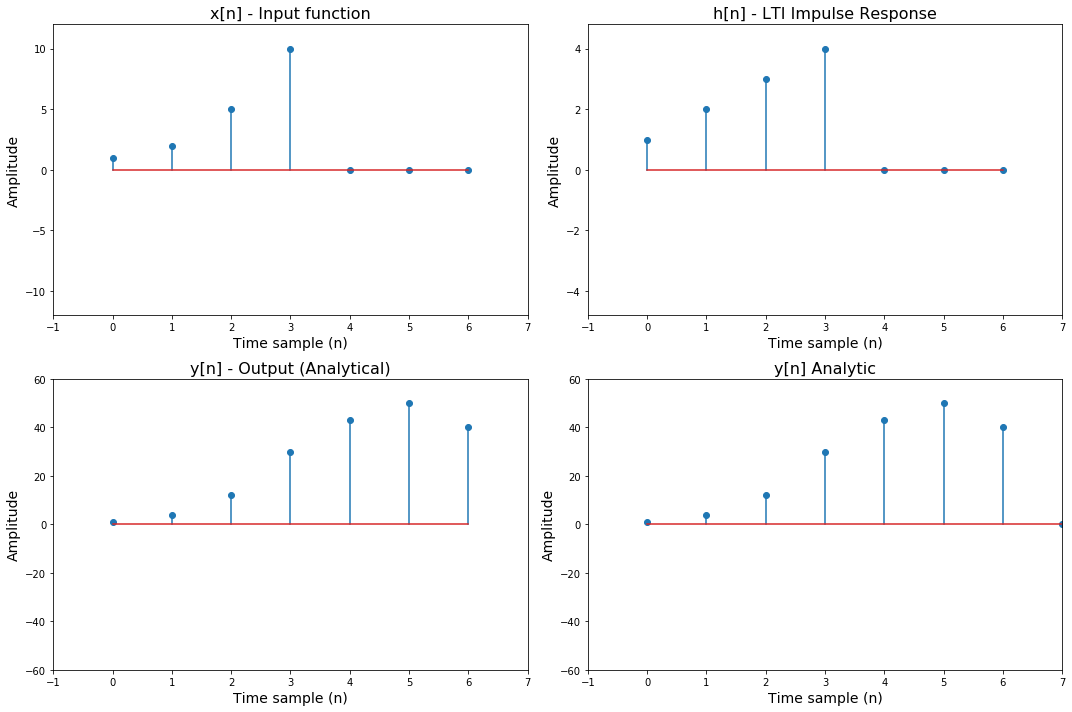

In [8]:
# . . Define the time samples 'n'
nlen=7;
n = np.arange(0,nlen,1) 

# . . Define x[n] input
x = np.zeros(n.size)
for nn in range(0,4,1):
    x[nn]=nn*nn+1

# . . Define h(t) - LTI impulse reponse
h = np.zeros(n.size)
for nn in range(0,4,1):
    h[nn]=nn+1

# . . Define y(t) - output (computed analytically)
y1= np.zeros(n.size)
y1[0:7]=[1,4,12,30,43,50,40]

# . . Let's use the convolve function in np.signal.convolve!
# . . Define y(t) - output (computed numerically)
y2=np.convolve(x, h, mode='full') 

# . . Let's plot and compare!
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.stem(n,x)
plt.axis([-1,nlen,-1.2*max(x),1.2*max(x)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('x[n] - Input function',fontsize=16)

plt.subplot(222)
plt.stem(n,h)
plt.axis([-1,nlen,-1.2*max(h),1.2*max(h)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('h[n] - LTI Impulse Response',fontsize=16)

plt.subplot(223)
plt.stem(n,y1)
plt.axis([-1,nlen,-1.2*max(y1),1.2*max(y1)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('y[n] - Output (Analytical)',fontsize=16)

plt.subplot(224)
plt.stem(range(0,y2.size,1),y2)
plt.axis([-1,nlen,-1.2*max(y2),1.2*max(y2)])
plt.xlabel('Time sample (n)',fontsize=14)
plt.ylabel('Amplitude',fontsize=14)
plt.title('y[n] Analytic',fontsize=16)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 8. Illustrating the discrete convolution between (a) an input function $x[n]$ and (b) a LTI response $h[n]$ which yields (c) discrete convolution result $y[n]$. (d) is the analytical result in equation 47 above.**

Let's now calculate the difference between the analytical and numerical results:

In [9]:
print("THE DIFFERENCE BETWEEN THE ANALYTIC AND NUMERICAL OUTPUTS IS:")
print(y2[0:6]-y1[0:6])

THE DIFFERENCE BETWEEN THE ANALYTIC AND NUMERICAL OUTPUTS IS:
[ 0.  0.  0.  0.  0.  0.]


# Linear Constant Cofficient Difference Equations (LCCDE)

Another important class of equations that can be developed are **linear constant coefficient difference equations** or LCCDE for short. Mathematically, these can be defined by the following systems:

<div class="alert alert-info" role="alert">
For an LTI system its input $x[n]$ and output $y[n]$ are related via a Nth order linear constant coefficient [difference equation](https://en.wikipedia.org/wiki/Linear_difference_equation):

$$ \sum_{k=0}^{N} a_k y[n-k] = \sum_{k=0}^{M} b_k x[n-k] \tag{48} $$

which is useful to check whether (or not) a system is both linear and time-invariant. 
</div>

LCCDE's commonly arise in system exhibiting discrete (rather than continuous) behaviour.  Examples include:
* Compound interest that is paid on a discrete interval (e.g., monthly).
* Population growth (the number of a species born has to be an integer!)

A system with coefficient $a_k\neq 0, k\ge 1$ is said to have **feedback** since the current output value depends on the *previous* output values.  A filter exhibiting such a characteristic is called both a **recursive filter** or an **infinite-impulse response (IIR) filter**.  For an LTI system where $a_k=0, k\ge 1$ does not have feedback, and is called a **nonrecursive filter** or a **finite-impulse response (FIR) filter**.  We will be covering both IIR and FIR filters later on in the course.

### EXAMPLE 9 

Determine if the following input-output relationships correspond to LTI systems:

(1) $\quad y[n]=0.1y[n-1]+x[n]+x[n-1]$:  
   * Yes, this is an LTI system with $N=M=1$ and $a_0=1, a_1=-0.1$ and $b_0=b_1=1$.


(2) $\quad y[n]=x[n+1]+x[n]$
   * Yes, we note that $y[n]=x[n+1]+x[n] \rightarrow y[n-1]=x[n]+x[n-1]$, which is an LTI system with $N=M=1, a_0=0$ and $b_1=b_0=b_1=1$.


(3) $\quad y[n] = 1/x[n] $
   * No, because $x[n]$ and $y[n]$ are not linear in this system.

### EXAMPLE 10 

**Q:** You invest money in a bank account with input of $x[n]=x_0\delta[n]$.  You receive an annual interest rate of $p$%, and conversion period equal to $\alpha$ (i.e., monthly) so that the interest earned for the period is equal to $\alpha p$% $\left(\mathrm{or}\,\frac{\alpha p}{100}\right)$ of the amount on deposit at the start of the period. What is your balance after 20 years?

**A:** You can model this system as the following:

$$
\left\{
\begin{array}{c}
amount\,on \\
deposit\\
after\,n\\
conversion \\
periods
\end{array}
\right\}
=
\left\{
\begin{array}{c}
amount\,on \\
deposit\\
after\,n-1\\
conversion \\
periods
\end{array}
\right\}
+
\frac{\alpha p}{100}
\left\{
\begin{array}{c}
amount\,on \\
deposit\\
after\,n-1\\
conversion \\
periods
\end{array}
\right\}
+
\left\{
\begin{array}{c}
amount\, \\
deposited \\
during\\
n-1 \\
period
\end{array}
\right\},
\tag{49}
$$

We may write:

$$ y[n] = y[n-1]+\frac{\alpha p}{100}y[n-1] + x[n-1] = \left(1+\frac{\alpha p}{100}\right)\,y[n-1] + x[n-1] \tag{50} $$

where $x[n]=x_0\delta[n]$ is the *input* time series.  Recognising that this system has *feedback*, we find the following recursion relationship

$$y[n]= \left(1+\frac{\alpha p}{100}\right)^n y[0] = \left(1+\frac{\alpha p}{100}\right)^n x_0 = \left(1+r\right)^n x_0. \tag{51} $$

Note that this exponential growth is an example of a IIR filter! 

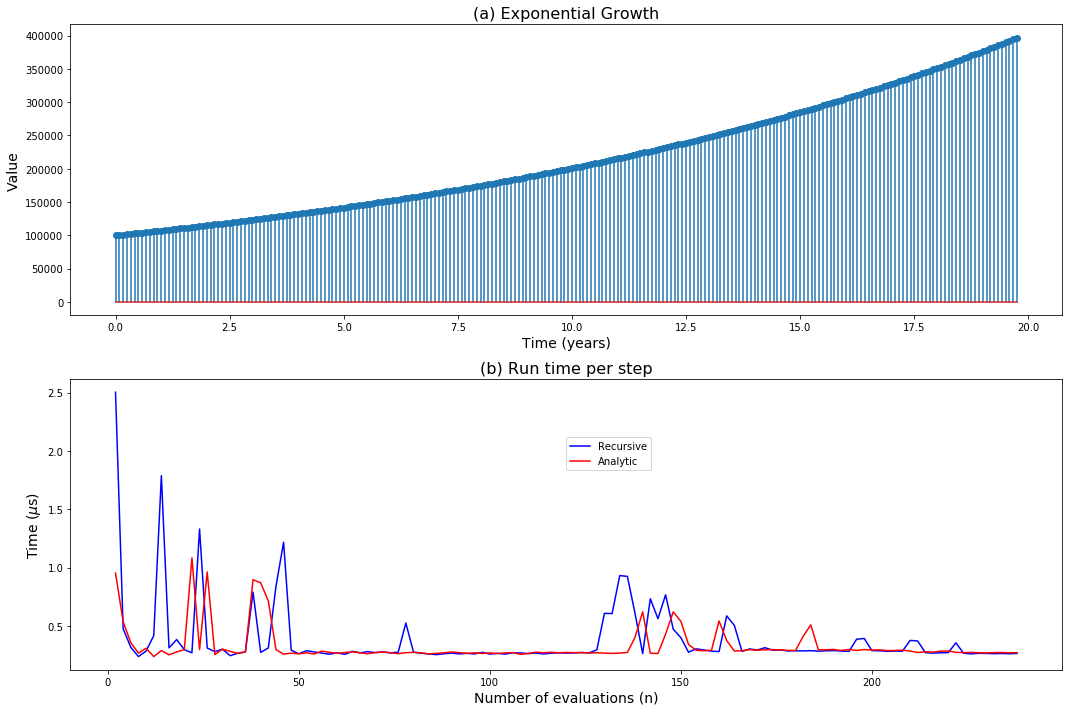

In [10]:
tstart,tstopp,dt=2,20*12,2

recursive=np.zeros(len(range(tstart,tstopp,dt)))
analytic =np.zeros(len(range(tstart,tstopp,dt)))
                   
mm=0
for nlen in range(tstart,tstopp,dt):

    n = np.arange(0,nlen,1)
    y = np.zeros(nlen) 

    # . . Define alpha, p and x_0
    alpha=1./12.; # monthly
    p=7.; # five precent
    opr=1+alpha*p/100.;
    x0=100000.

    t0 = time()
    y[0]=x0
    for nn in range(1,nlen,1):
        y[nn]=opr*y[nn-1]
    t1 = time()
    recursive[mm]=(t1-t0)/float(nlen)
     
    t2 = time()
    for nn in range(1,nlen,1):
        y[nn]=x0*opr**nn
    t3 = time()
    analytic [mm]=(t3-t2)/float(nlen)

    mm=mm+1

plt.figure(figsize=(15,10))

plt.subplot(211)
plt.stem(n*alpha,y)
plt.xlabel('Time (years)',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title('(a) Exponential Growth',fontsize=16)

plt.subplot(212)
plt.plot(range(tstart,tstopp,dt),recursive*1000000.,'b',label="Recursive")
plt.plot(range(tstart,tstopp,dt),analytic *1000000.,'r',label="Analytic")
plt.xlabel('Number of evaluations (n)',fontsize=14)
plt.ylabel('Time ($\mu$s)',fontsize=14)
plt.title('(b) Run time per step',fontsize=16)
plt.legend(bbox_to_anchor=(0.5, 0.8), loc=2, borderaxespad=0.)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

**Figure 9. (a) Illustration of Exponential Growth in a bank account. (b) Computational cost to calculate the result based on a recursive versus analytic calculation.**

### EXAMPLE 11 

You have borrowed some money from the bank for a mortgage.  Assuming a starting loan of $y[0]=x_0$, an annual interest rate of $p$%, and conversion period equal to $\alpha$ (e.g., monthly), the interest earned for the period is equal to $\alpha p$% (or $\frac{\alpha p}{100}$) of the amount on deposit at the start of the period.  You have a choice of paying either a constant $\beta$ per $\alpha$ period (i.e., $x[n-1]=\beta$) or paying an exponentially decaying amount per month (i.e., $x[n-1]=R_0\mathrm{e}^{-\gamma n}$).  What do you choose?

$$
\left\{
\begin{array}{c}
amount\,on \\
mortgage\\
after\,n\\
conversion \\
periods
\end{array}
\right\}
=
\left\{
\begin{array}{c}
amount\,on \\
mortgage\\
after\,n-1\\
conversion \\
periods
\end{array}
\right\}
+
\frac{\alpha p}{100}
\left\{
\begin{array}{c}
amount\,on \\
mortgage\\
after\,n-1\\
conversion \\
periods
\end{array}
\right\}
-
\left\{
\begin{array}{c}
amount \\
paid\\
during\\
the\,n-1 \\
period
\end{array}
\right\},
\tag{52}
$$

This is close to the example above, except that now the system has input $x[n-1]$.  

$$ y[n] = y[n-1]+\frac{\alpha p}{100}y[n-1] - x[n-1] = \left(1+\frac{\alpha p}{100}\right)\,y[n-1]-x[n-1] \tag{53}$$

where $x[n-1]$ is either $x[n-1]=\beta$ or $x[n-1]=R_0\mathrm{e}^{-\gamma n}$.  Now it's much harder to determine an analytic solution for this system (though not impossible)! Let's see what the difference in the different payment schemes actually is.

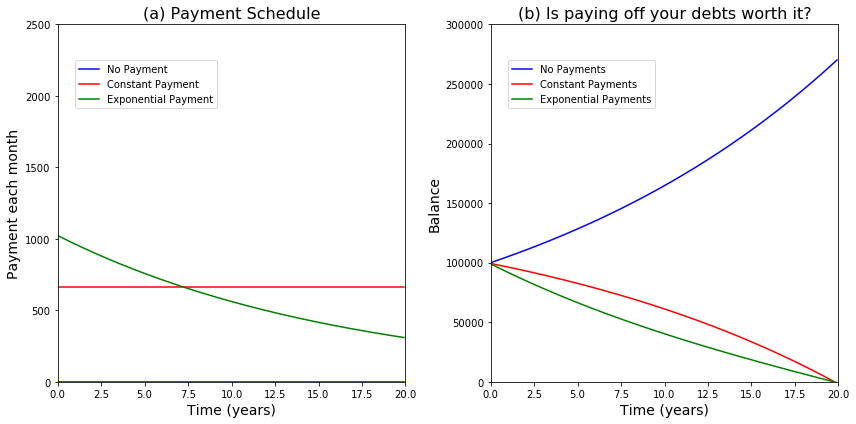

TOTAL CONSTANT PAYMENTS   : $158400.00
TOTAL EXPONENTIAL PAYMENTS: $143333.40
You'd better do exponential payments!


In [11]:
# . . Close previous plotting sessions
plt.close('all')

# . . Define the input parameters (i.e. the coefficients)
nlen=12*20          # . . Loan period12 months times 20 years
alpha=1./12.;       # . . Payment frequnecy monthly
p=5.;               # . . Interest rate of five precent
x0=100000.          # . . Starting balance
pay=0.0066*x0       # . . Exponential payment
opr=1+alpha*p/100.; # . . Coefficient

# . . Define the various required arrays
n = np.arange(0,nlen,1)                      # . . Payment index
zeropayment = np.zeros(len(range(0,nlen,1))) # . . For no payments
conspayment = np.zeros(len(range(0,nlen,1))) # . . Constant payments
expopayment = np.zeros(len(range(0,nlen,1))) # . . Exponential payments
payments    = np.zeros(len(range(0,nlen,1))) # . . Input payments for exponential (i.e., x[n])                 

# . . Define exponential paymetns
for nn in range(0,len(payments),1):
    payments[nn]=1.55*pay*np.exp(-0.005*nn)

# . . Set initial balance conditions
zeropayment[0]=x0
conspayment[0]=x0-pay
expopayment[0]=x0-payments[0]

# . . Recursively compute the balance out to twenty years
for nn in range(1,nlen,1):
    zeropayment[nn]=opr*zeropayment[nn-1]
    conspayment[nn]=opr*conspayment[nn-1]-pay
    expopayment[nn]=opr*expopayment[nn-1]-payments[nn-1]
    
# . . Plot the different payment schemes
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(n*alpha,0*np.ones(len(n)),'b',label='No Payment')
plt.plot(n*alpha,pay*np.ones(len(n)),'r',label='Constant Payment')
plt.plot(n*alpha,payments,'g',label='Exponential Payment')
plt.axis([0,20,0,2500])
plt.xlabel('Time (years)',fontsize=14)
plt.ylabel('Payment each month',fontsize=14)
plt.title('(a) Payment Schedule',fontsize=16)
plt.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.)

# . . Plot the resulting balances
plt.subplot(122)
plt.plot(n*alpha,zeropayment,'b',label="No Payments")
plt.plot(n*alpha,conspayment,'r',label="Constant Payments")
plt.plot(n*alpha,expopayment,'g',label="Exponential Payments")
plt.xlabel('Time (years)',fontsize=14)
plt.ylabel('Balance',fontsize=14)
plt.title('(b) Is paying off your debts worth it?',fontsize=16)
plt.axis([0,20,0,300000])
plt.legend(bbox_to_anchor=(0.05, 0.9), loc=2, borderaxespad=0.)

plt.tight_layout() # . . Make it so that the subplots don't overlap
plt.show()

# . . Write out the total amount paid into the system
# . . Note that the %08.2f is to write the amount with only two decimal places
print('TOTAL CONSTANT PAYMENTS   : $%08.2f'%(nlen*pay))
print('TOTAL EXPONENTIAL PAYMENTS: $%08.2f'%(sum(payments)))

# . . Write out which way would be better
if (nlen*pay < sum(payments)):
    print("You'd better do constant payments!")
else:
    print("You'd better do exponential payments!")

**Figure 10. Example of more complex system involving monthly mortgage payments. (a) Three differrent strategies fo paying off ones mortgage: non-payment (blue), constant payment (red), and exponential decay payment (green). (b) Resulting mortgage balance following each strategy.  It's best to pay more upfront!**

### EXAMPLE 12 

**Q:** Moneyball!  Your baseball manager wants you to design a filter to automatically calculate the running average of the hitting percentage of each player for the previous $M$ at bats.  

**A:** You note that the requsted analysis is *non-recursive* (i.e., no feedback) since the output average after the next at bat does not depend on the output average of the previous. Assuming that the input hits are given by $x[n]$, you write the following averaging formula:

$$ y[n]=\sum_{m=0}^{M-1} \frac{x[n-m]}{M} \tag{54} $$

Note that the averaging process as written is an example of a FIR filter.

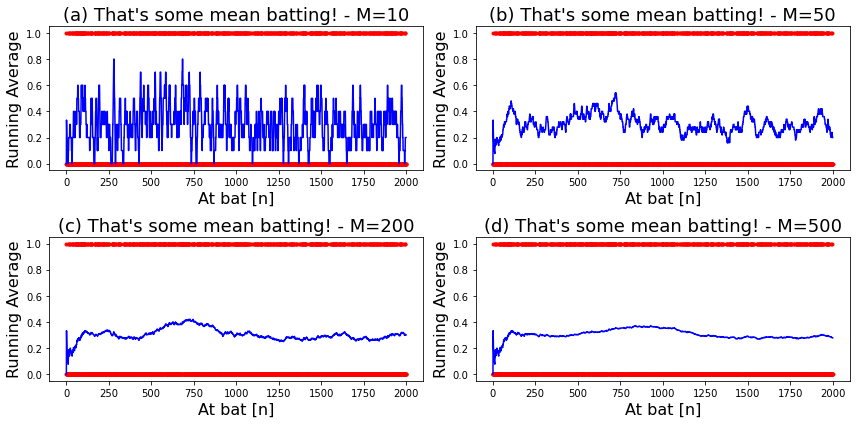

In [6]:
N = 2000 # . . Career total at bats
p = 0.3  # . . Expected batting percentage (say a "300" hitter)

# . . Define hits array
values  = np.zeros(N)
meanval = np.zeros(N)

# . . Generate a random sequence
for ii in range(0,len(values),1):
    values[ii] = np.random.binomial(1,p)

title=['(a)','(b)','(c)','(d)']
plt.figure(figsize=(12,6))
jj=1 # . . Counter for subplot
for M in (10,50,200,500): # . . Number of points to average over
    # . . Now let's run the mean filter on it
    for ii in range(0,len(values),1):
        if (ii < M): 
            meanval[ii] = sum(values[0:ii])/(ii+1)
        else:
            meanval[ii] = sum(values[ii-M:ii])/M

    plt.subplot(2,2,jj)
    plt.plot(range(0,len(values),1),values,'r.')
    plt.plot(range(0,len(values),1),meanval,'b')
    plt.xlabel("At bat [n]",fontsize=16)
    plt.ylabel("Running Average",fontsize=16)
    plt.title(title[jj-1]+" That's some mean batting! - M=%d"%(M),fontsize=18)
    jj=jj+1

plt.tight_layout() # . . Make it so that the subplots don't overlap   
plt.show()

**Figure 11. Batting average of last $M$ at bats. (a) $M=10$. (b) $M=50$. (c) $M=200$. (d) $M=500$.**

You then notice that you can write this in a different way:

$$ y[n] = y[n-1] +\frac{1}{M}\left(x[n] - x[n-M]\right) \tag{55}$$

Which way is "better"? How would you test this?